## Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## DataSet

In [2]:
df = pd.read_csv('House_Rent_Dataset.csv')
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


Let's check how much Rent points are outliers.

<AxesSubplot:xlabel='Rent'>

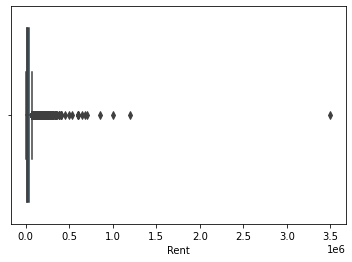

In [3]:
sns.boxplot(x = df['Rent'], data = df)

We will remove Posted On because it's not important for this case.

In [4]:
df.drop('Posted On', axis = 1, inplace = True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   BHK                4746 non-null   int64 
 1   Rent               4746 non-null   int64 
 2   Size               4746 non-null   int64 
 3   Floor              4746 non-null   object
 4   Area Type          4746 non-null   object
 5   Area Locality      4746 non-null   object
 6   City               4746 non-null   object
 7   Furnishing Status  4746 non-null   object
 8   Tenant Preferred   4746 non-null   object
 9   Bathroom           4746 non-null   int64 
 10  Point of Contact   4746 non-null   object
dtypes: int64(4), object(7)
memory usage: 408.0+ KB


As you should kow, usually we can't feed Categorical Variables to our dataset, in this case we have to take care of it.

In [6]:
df.describe()

,BHK,Rent,Size,Bathroom
count,4746.000000,4.746000e+03,4746.000000,4746.000000
mean,2.083860,3.499345e+04,967.490729,1.965866
std,0.832256,7.810641e+04,634.202328,0.884532
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


We have only 4 numerical variables, we can note that,
- We will need to standardize the data, the mean are in different magnitudes. And we have dollars with number of housing spaces.
- We don't have NaN values. Atleast in the numerical variables.



In [7]:
df.isna().sum()

BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

No NaN values in our dataset

## Data Knowledge

In [8]:
df.head()

,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


#### Rent vs Size

<AxesSubplot:xlabel='Size', ylabel='Rent'>

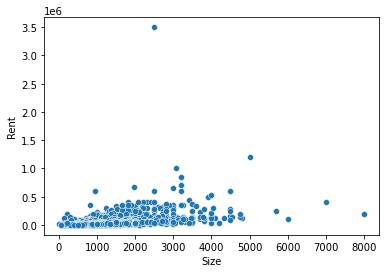

In [9]:
sns.scatterplot(x='Size',y='Rent', data = df)

We don't have strong correlation between Size & Rent, meaning that a bigger house (Alone!) is not a synonym of an expensive house.

#### Bathroom vs Rent

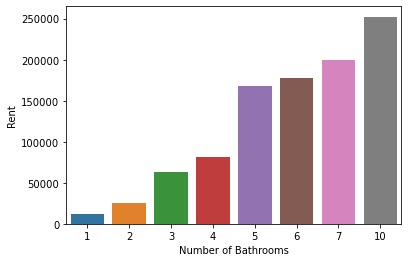

In [10]:
df_bathroom_mean = df.groupby('Bathroom')['Rent'].mean().round(2)

ax = sns.barplot(x = df_bathroom_mean.index, y = df_bathroom_mean.values, data = df_bathroom_mean)
ax.set_xticklabels(df_bathroom_mean.index)
ax.set(xlabel='Number of Bathrooms', ylabel='Rent')
plt.show()

We can clearly see that more bathrooms have a bigger Rent Price in average.

#### Floor vs Rent

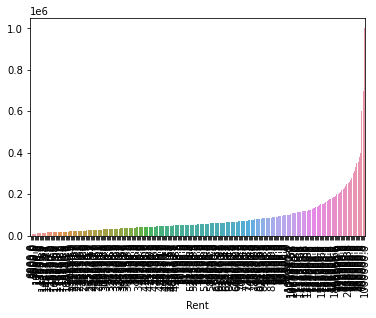

In [50]:
df_floor_mean = df.groupby('Floor')['Rent'].mean().round(2)

ax = sns.barplot(x = df_floor_mean.index, y = df_floor_mean.values, data = df_floor_mean)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.show()

The area type is importanto for the definion of Price. Super Area is the area where the wealthier people live, and so on. So, this is an important characteristic for the definition of Price.

#### City vs Rent

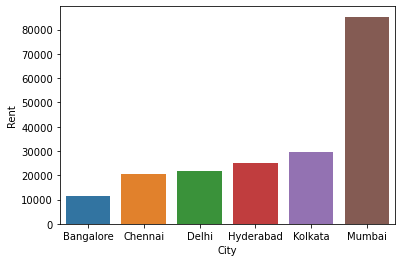

In [12]:
df_city_mean = df.groupby('City')['Rent'].mean().round(2)

ax = sns.barplot(x = df_city_mean.index, y = df_city_mean.values, data = df_city_mean)
ax.set_xticklabels(df_city_mean.index)
ax.set(xlabel='City', ylabel='Rent')
plt.show()

The Prices in the capital are way expensive that in the others India locations.

#### Tenant vs Rent & Point of Contact vs Rent

This are two of the metrics that I'm more curious about, will the type of people that are renting influenting the price?

It's the Point of Contact, an important metric?

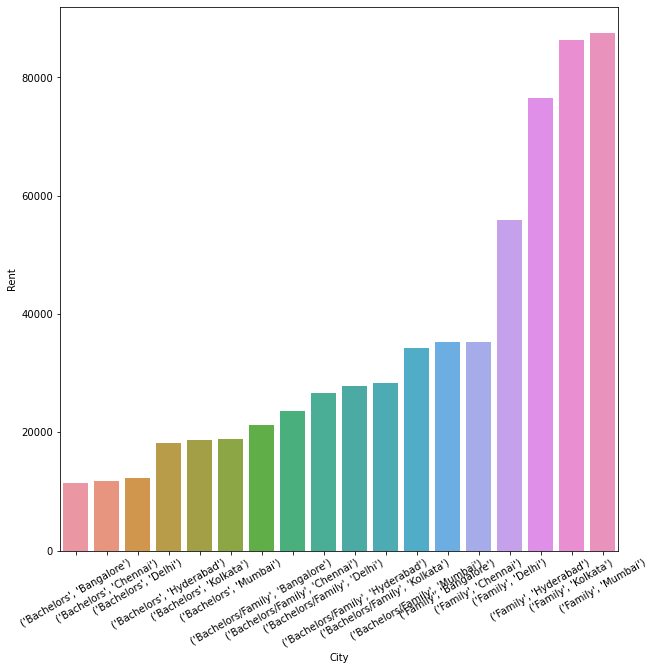

In [13]:
df_tenant_mean = df.groupby(['Tenant Preferred','City'])['Rent'].mean().round(2)

fig, ax = plt.subplots(figsize=(10,10))
ax = sns.barplot(x = df_tenant_mean.index, y = df_tenant_mean.values, data = df_tenant_mean)
ax.set_xticklabels(df_tenant_mean.index, rotation = 30)
ax.set(xlabel='City', ylabel='Rent')
plt.show()

With Tenant we can conclude that no matter the City that the house is in, usually, Families have a higher rent than Bachelors for example.

Bigger houses, with more compartments are usually linked to bigger families as usual.

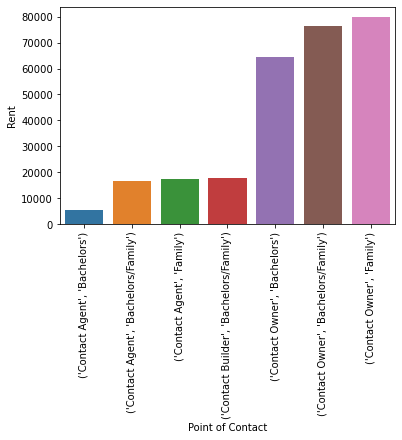

In [14]:
df_pcontact_mean = df.groupby(['Point of Contact','Tenant Preferred'])['Rent'].mean().round(2)

ax = sns.barplot(x = df_pcontact_mean.index, y = df_pcontact_mean.values, data = df_pcontact_mean)
ax.set_xticklabels(df_pcontact_mean.index, rotation = 90)
ax.set(xlabel='Point of Contact', ylabel='Rent')
plt.show()

Well, to be completely honest I was not expecting this. I assume that sales comission were a thing that increased the prices with Contact Agents or even Contact Builders, however I was wrong.

Contact Owner probably don't want to negotiate values is what I assume. This metric will be relevant to our model for sure.

## Encoding Categorical variables

We have the following categorical variables.

In [15]:
df.select_dtypes(include=['object']).columns.tolist()

['Floor',
 'Area Type',
 'Area Locality',
 'City',
 'Furnishing Status',
 'Tenant Preferred',
 'Point of Contact']

We have several methods to apply to encode categorical variables namely get_dummies, onehotencoder, labelencoder or a simple mapping.

We will use the ones for the purpose that we want. I'm a fan of mapping and onehotencoder and we will base our analysis in this two methods.

In [16]:
cat = df.select_dtypes(include=['object']).columns.tolist()
for column in cat:
    print(f'{column} has a len of {len(df[column].unique())}')

Floor has a len of 480
Area Type has a len of 3
Area Locality has a len of 2235
City has a len of 6
Furnishing Status has a len of 3
Tenant Preferred has a len of 3
Point of Contact has a len of 3


#### Area Locality & Floor

We have two problems here we are not able no map Floor and Area Locality, and we have 480 different entries for Floor and 2235 for Area Locality, this will bring us a big problem. 
When we OneHot encode(or get_dummies) we will have instead of 2 columns, 480 + 2235, what will make our model ridiculous slow.

So we will see how many different datapoints are in the 10 first most common data points.

In [17]:
df['Area Locality'].value_counts()[:-10]

Bandra West                         37
Gachibowli                          29
Electronic City                     24
Velachery                           22
Miyapur, NH 9                       22
                                    ..
Attur Layout, Yelahanka New Town     1
Best Nagar Goregaon West             1
RT Nagar                             1
Shanti Nagar                         1
Sir M V Nagar                        1
Name: Area Locality, Length: 2225, dtype: int64

So we have several locations with 1 entry and the most common has 37. What is not that representative for our model to establish a correct relationships so we will drop this column.

In [18]:
df.drop('Area Locality', axis = 1, inplace = True)

Regarding Floor as we have a smaller amount of entries, and floor matter as we saw in the graphs instead of having the floor that the apartment is at we will have just the floor.

In [19]:
for entry in df['Floor']:    
    df['Floor'] = df['Floor'].replace(entry,entry[0])
df.head()

,BHK,Rent,Size,Floor,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2,10000,1100,G,Super Area,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2,20000,800,1,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2,17000,1000,1,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2,10000,800,1,Super Area,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2,7500,850,1,Carpet Area,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [20]:
df['Floor'].unique()

array(['G', '1', '2', '4', '3', '5', '7', '8', 'U', 'L', '6', '9'],
      dtype=object)

As we have G as Ground Floor, let's replace it by 0.

In [21]:
df['Floor'] = df['Floor'].replace('G',0)
df.head()

,BHK,Rent,Size,Floor,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2,10000,1100,0,Super Area,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2,20000,800,1,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2,17000,1000,1,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2,10000,800,1,Super Area,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2,7500,850,1,Carpet Area,Kolkata,Unfurnished,Bachelors,1,Contact Owner


As we have U - Upper Basement and L - Lower Basement that are immediately below Floor 0.
So we will map U with -1 and L with -2.

In [22]:
df['Floor'] = df['Floor'].replace('U',-1)
df['Floor'] = df['Floor'].replace('L',-2)

#### Area Type, Furnishing, Tenant and Point of Contact - Feature Engineering

In [23]:
df[['Area Type','Furnishing Status', 'Tenant Preferred', 'Point of Contact']].head()

,Area Type,Furnishing Status,Tenant Preferred,Point of Contact
0,Super Area,Unfurnished,Bachelors/Family,Contact Owner
1,Super Area,Semi-Furnished,Bachelors/Family,Contact Owner
2,Super Area,Semi-Furnished,Bachelors/Family,Contact Owner
3,Super Area,Unfurnished,Bachelors/Family,Contact Owner
4,Carpet Area,Unfurnished,Bachelors,Contact Owner


We have 3 variables for each of one of columns I will explain How to do so.

As it's not binary we need to be aware that the order will be a thing that we need to be careful.

Example: Imagine that we had one column that had like the proximity to the sea that could be ('Sea view', '30 minutes to the sea', '60 minutes to the sea'). If we map this like sea view as 0, 60 minutes as 1, 30 minutes as 2. The model will believe that label 1 is closer but it's not true.

Our case we need to completely aware that we need to put this in order that makes sense, and if we are not sure we revisit the graphs that we made previously.

In [24]:
cat_dummies = ['Area Type', 'Furnishing Status','Tenant Preferred','Point of Contact']
for col in cat_dummies:
    print(df[col].unique())

['Super Area' 'Carpet Area' 'Built Area']
['Unfurnished' 'Semi-Furnished' 'Furnished']
['Bachelors/Family' 'Bachelors' 'Family']
['Contact Owner' 'Contact Agent' 'Contact Builder']


In [25]:
df['Area Type'] = df['Area Type'].map({'Built Area':0,'Carpet Area':1, 'Super Area': 2})
df['Furnishing Status'] = df['Furnishing Status'].map({'Unfurnished':0,'Semi-Furnished':1, 'Furnished': 2})
df['Tenant Preferred'] = df['Tenant Preferred'].map({'Bachelors':0,'Bachelors/Family':1, 'Family': 2})
df['Point of Contact'] = df['Point of Contact'].map({'Contact Agent':0,'Contact Builder':1, 'Contact Owner': 2})
df[['Area Type','Furnishing Status', 'Tenant Preferred', 'Point of Contact']].head()

,Area Type,Furnishing Status,Tenant Preferred,Point of Contact
0,2,0,1,2
1,2,1,1,2
2,2,1,1,2
3,2,0,1,2
4,1,0,0,2


#### City OneHotEncoder

In [26]:
df.shape

(4746, 10)

In [27]:
#Import the library

from sklearn.preprocessing import OneHotEncoder

#If you still have NaN numbers use ignore. We want an array to integrate in the dataframe

encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

#Build another DataFrame with the columns that we want to encode

df_encoded = pd.DataFrame(encoder.fit_transform(df[['City']]))

#Get the name of the features to be able to add to the columns now created

df_encoded.columns = encoder.get_feature_names_out(['City'])

#Drop the categorical columns from the original dataset

df.drop(['City'] ,axis=1, inplace=True)

#Concatenate the two dataframes
df = pd.concat([df, df_encoded], axis=1)

#Optional:I had some NaN values on the final dataset that I removed it.

df.shape

(4746, 15)

## Add Columns

In [28]:
df.head()

,BHK,Rent,Size,Floor,Area Type,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,City_Bangalore,City_Chennai,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai
0,2,10000,1100,0,2,0,1,2,2,0.0,0.0,0.0,0.0,1.0,0.0
1,2,20000,800,1,2,1,1,1,2,0.0,0.0,0.0,0.0,1.0,0.0
2,2,17000,1000,1,2,1,1,1,2,0.0,0.0,0.0,0.0,1.0,0.0
3,2,10000,800,1,2,0,1,1,2,0.0,0.0,0.0,0.0,1.0,0.0
4,2,7500,850,1,1,0,0,1,2,0.0,0.0,0.0,0.0,1.0,0.0


We will introduce some changes in our dataset,

- We will sum BHK with Bathrooms, and we have the all compartments in an apartment/house.
- We will add a column that is the price per square feet.
- We will add a column that is the price per compartment

In [29]:
#calculate the number of compartments
df['Compartments'] = df['BHK'] + df['Bathroom']

#calculate the price per square feet
df['price_per_square_feet'] = df['Rent'] / df['Size']

#calculate the price per compartment
df['price_per_compartment'] = df['Rent'] / df['Compartments']

#Drop the two columns
df.drop(['BHK','Bathroom', 'Size'], axis = 1, inplace = True)

df.head()

,Rent,Floor,Area Type,Furnishing Status,Tenant Preferred,Point of Contact,City_Bangalore,City_Chennai,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai,Compartments,price_per_square_feet,price_per_compartment
0,10000,0,2,0,1,2,0.0,0.0,0.0,0.0,1.0,0.0,4,9.090909,2500.000000
1,20000,1,2,1,1,2,0.0,0.0,0.0,0.0,1.0,0.0,3,25.000000,6666.666667
2,17000,1,2,1,1,2,0.0,0.0,0.0,0.0,1.0,0.0,3,17.000000,5666.666667
3,10000,1,2,0,1,2,0.0,0.0,0.0,0.0,1.0,0.0,3,12.500000,3333.333333
4,7500,1,1,0,0,2,0.0,0.0,0.0,0.0,1.0,0.0,3,8.823529,2500.000000


To finalize the datapreprocessing we need to pass our column 'Floor' that is a string to a int.

In [30]:
df['Floor'].value_counts()

1     1493
2     1004
0      927
3      532
4      284
5      167
6       99
7       75
8       66
9       65
-1      23
-2      11
Name: Floor, dtype: int64

In [31]:
df['Floor'] = df['Floor'].astype('float')

<AxesSubplot:xlabel='Rent'>

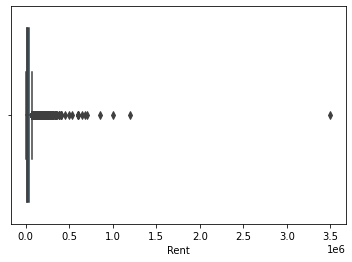

In [32]:
sns.boxplot(x = df['Rent'], data = df)

In [33]:
#calculate the q75, 125
q75,q25 = np.percentile(df['Rent'], [75,25])

#calculate iqr
iqr = q75 - q25

#define the maximum whisker
max_whi = q75+(1.5*iqr)

#define the minimum whisker
min_whi = q75-(1.5*iqr)

In [34]:
to_drop = df[(df['Rent'] > max_whi) | (df['Rent'] < min_whi)].index.values
df.drop(to_drop, inplace = True)

In [35]:
df.isna().sum()

Rent                     0
Floor                    0
Area Type                0
Furnishing Status        0
Tenant Preferred         0
Point of Contact         0
City_Bangalore           0
City_Chennai             0
City_Delhi               0
City_Hyderabad           0
City_Kolkata             0
City_Mumbai              0
Compartments             0
price_per_square_feet    0
price_per_compartment    0
dtype: int64

## Modelling

#### Split the data in Train & Test

In [36]:
X = df.drop('Rent', axis = 1)
y = df['Rent']

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

#### StandardScaling

First we will scale the dataset, because we have different level of values (p.ex 'price_per_compartment - Point of Contact')

In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [51]:
from sklearn.linear_model import Lasso, Ridge, LinearRegression, ElasticNet, LassoLars, BayesianRidge, SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold, cross_validate
from sklearn.metrics import mean_squared_error,explained_variance_score,mean_squared_error

In [123]:
'''Models'''

#Define your models inside a list, dont'forget that this should be a tuple, with the name and the model that you want to test
models = [
          ('LinearRegression', LinearRegression()), 
          ('Lasso', Lasso()),
          ('Ridge', Ridge()),
          ('DecisionTree', DecisionTreeRegressor()),
          ('RandomForestRegressor',RandomForestRegressor()),
          ('ElasticNet', ElasticNet()),
          ('LassoLars', LassoLars(normalize = False)),
          ('BayesianRidge', BayesianRidge()),
          ('SGD Regressor', SGDRegressor())
        ]

'''Accuracy'''

#In this chapter you will focus in the accuracy metrics that you want to access
#We will access the most significant f1score,recall,precission, roc_auc, and accuracy

scoring_metrics = ['r2']

#Initialize with the index of the metrics that you want to evaluate our model

dict_metrics = pd.DataFrame(index = ['explained_variance_score','mean_squared_error'])

#We will apply kfold in 5 splits (default value) and cross validation too

for model_name, model in models:
    #Initiate KFold
    kfold = KFold(n_splits = 5, shuffle = True, random_state = 42)
    
    #Perform a cross validate (this one will record fit/score times
    #Don't forget that we will use kfold as our cv, logic that we will have cv = 5 as we chose 5 splits.
    cv = cross_validate(model, X_train, y_train, cv = kfold, scoring = scoring_metrics)
    
    #Fit the model to the data
    model_fit = model.fit(X_train, y_train)
    
    #Predict X_test
    y_pred = model_fit.predict(X_train)
    
    dict_metrics[model_name] = [np.round(explained_variance_score(y_train, y_pred),2), np.round(np.sqrt(mean_squared_error(y_train, y_pred)),2)]
    
dict_metrics

,LinearRegression,Lasso,Ridge,DecisionTree,RandomForestRegressor,ElasticNet,LassoLars,BayesianRidge,SGD Regressor
explained_variance_score,0.91,0.91,0.91,1.0,1.00,0.82,0.91,0.91,0.91
mean_squared_error,4247.62,4247.54,4247.54,0.0,246.07,5933.35,4247.54,4247.54,4254.03


In [197]:
y_train.mean()

19349.54852071006

Looking to to the results, we can conclude the following,

- Explained Variance is very good sitting between 82 - 100% meaning that our model is close to perfection.

- Mean Squared Error is acceptable.

- In the other hand. Decision tree achieves a mean_squared_error of 0, meaning that the model is overfitting.

- ElasticNet was clearly the worst model.

- We have 1 very promising (RFRegressor) that is overfitting I believe, one that you need to check because is clearly overfitting (RFRegressor) and one that that I want to test. So we will fine tune the models and choose one of them.

#### SGDRegressor - Hyperparameter Tuning

In [198]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import RandomizedSearchCV


param_grid = [{'loss' : ['squared_error', 'huber', 'epsilon_insensitive'],
                'penalty' : ['l1', 'l2', 'elasticnet'],
                'alpha' : [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
                'learning_rate' : ['constant', 'optimal', 'invscaling', 'adaptive']}
             ]

sgd_reg = SGDRegressor()

radomized_sgd = RandomizedSearchCV(sgd_reg,param_grid, cv=10, return_train_score=True, n_jobs = -1)

radomized_sgd.fit(X_train, y_train)

Y_pred = radomized_sgd.predict(X_test)

R2_score = radomized_sgd.score(X_train, y_train)

RMSE_score = np.sqrt(mean_squared_error(y_test, Y_pred))

print(f'The data fit regression model: {R2_score}')
print(f'The mean squared error is {RMSE_score}')
print(f'The best params for the SGDRegressor: {radomized_sgd.best_params_}')

The data fit regression model: 0.9047041199310323
The mean squared error is 4244.8587019218985
The best params for the SGDRegressor: {'penalty': 'l2', 'loss': 'squared_error', 'learning_rate': 'optimal', 'alpha': 0.01}


We were able to fine tune the model. It is a good fit, near 1.0, however the mean squared error is too high.

#### RandomForestRegressor - Hyperparameter Tuning

In [202]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'bootstrap' : [False],'n_estimators':np.arange(1,30,2),'max_features':np.arange(1,10,3)}]

forest_reg = RandomForestRegressor()

gridsearch_forest = GridSearchCV(forest_reg,param_grid, cv=10, return_train_score=True, n_jobs = -1)

gridsearch_forest.fit(X_train, y_train)

Y_pred = gridsearch_forest.predict(X_test)

R2_score = gridsearch_forest.score(X_train, y_train)

RMSE_score = np.sqrt(mean_squared_error(y_test, Y_pred))

print(f'The data fit regression model: {R2_score}')
print(f'The mean squared error is {RMSE_score}')
print(f'The best params for the RandomForestRegressor: {gridsearch_forest.best_params_}')

The data fit regression model: 0.9999999752050237
The mean squared error is 1372.0804050980032
The best params for the RandomForestRegressor: {'bootstrap': False, 'max_features': 7, 'n_estimators': 25}


We were able to remove the overfitting and we have almost a perfect data fit to the regression and a very interesting mean squared error.

#### DecisionTreeRegressor - Hyperparameter Tuning

In [204]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'max_depth': [5, 10, 15], 'max_features': ['auto', 'log2'], 
                }]

decision_reg = DecisionTreeRegressor()

decision_tree = GridSearchCV(decision_reg,param_grid, cv=10, return_train_score=True, n_jobs = -1)

decision_tree.fit(X_train, y_train)

Y_pred = decision_tree.predict(X_test)

R2_score = decision_tree.score(X_train, y_train)

RMSE_score = np.sqrt(mean_squared_error(y_test, Y_pred))

print(f'The data fit regression model: {R2_score}')
print(f'The mean squared error is {RMSE_score}')
print(f'The best params for the DecisionTreeRegressor: {decision_tree.best_params_}')

The data fit regression model: 0.9999967009005003
The mean squared error is 906.7187757057451
The best params for the DecisionTreeRegressor: {'max_depth': 10, 'max_features': 'auto'}


We were able to remove the overfitting, a perfect data fit to the regression and a the best mean squared error until now.

## DecisionTreeRegressor - Test Analysis

In [205]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'max_depth': [5, 10, 15], 'max_features': ['auto', 'log2'], 
                }]

decision_reg = DecisionTreeRegressor()

decision_tree = GridSearchCV(decision_reg,param_grid, cv=10, return_train_score=True, n_jobs = -1)

decision_tree.fit(X_train, y_train)

Y_pred = decision_tree.predict(X_test)

R2_score = decision_tree.score(X_test, y_test)

RMSE_score = np.sqrt(mean_squared_error(y_test, Y_pred))

print(f'The data fit regression model: {R2_score}')
print(f'The mean squared error is {RMSE_score}')
print(f'The best params for the DecisionTreeRegressor: {decision_tree.best_params_}')

The data fit regression model: 0.9953905255981944
The mean squared error is 940.1210235959476
The best params for the DecisionTreeRegressor: {'max_depth': 15, 'max_features': 'auto'}


##### Decision Tree Feature Importance

In [207]:
feature_importances = decision_tree.best_estimator_.feature_importances_
sorted(zip(feature_importances, X.columns), reverse = True)

[(0.7560025511155556, 'price_per_compartment'),
 (0.24328904649837857, 'Compartments'),
 (0.0003421772810371764, 'price_per_square_feet'),
 (0.00012147853409774524, 'Tenant Preferred'),
 (8.599881347406273e-05, 'Floor'),
 (4.3054451879555474e-05, 'City_Hyderabad'),
 (4.1177449758166896e-05, 'Area Type'),
 (3.3627154512783666e-05, 'City_Bangalore'),
 (3.314151139926004e-05, 'Furnishing Status'),
 (4.423063727779973e-06, 'City_Mumbai'),
 (1.614256269377938e-06, 'Point of Contact'),
 (1.0331240124020577e-06, 'City_Delhi'),
 (6.457521771744004e-07, 'City_Chennai'),
 (3.0993720372046956e-08, 'City_Kolkata')]

## Conclusion

#### Best Model

##### Decision Tree Regressor

#### Feature Importance

1 - Price Per Compartment
2 - Number of Compartment